
## Date - 21/10/2023
## Team ID - 3923
## Project Title - Customer churn prediction 

The dataset used in this analysis is from Kaggle [Telcom Customer Churn](https://www.kaggle.com/blastchar/telco-customer-churn#WA_Fn-UseC_-Telco-Customer-Churn.csv)

### Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." 


## Data Interpretation

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.style.use('ggplot')

from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

## Loding dataset and data exploration

In [ ]:
telcom = pd.read_csv('./Datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv')
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data_check = pd.DataFrame(telcom.isnull().sum(),columns=['Missing Value Count'])
data_check['Unique Value COunt'] = telcom.nunique()
data_check

,Missing Value Count,Unique Value COunt
customerID,0,7043
gender,0,2
SeniorCitizen,0,2
Partner,0,2
Dependents,0,2
tenure,0,73
PhoneService,0,2
MultipleLines,0,3
InternetService,0,3
OnlineSecurity,0,3


In [ ]:
print(telcom.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [ ]:
telcom['TotalCharges'] = telcom['TotalCharges'].apply(lambda x: x.replace(' ',''))
telcom['TotalCharges'] = telcom['TotalCharges'].apply(lambda x: float(x) if len(x)!=0 else 0)
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

## Data Visualizaiton

In [ ]:
print(telcom.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


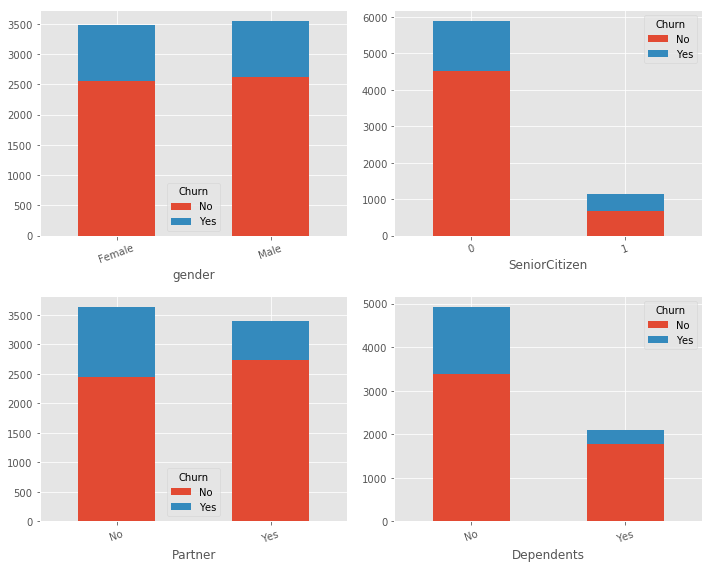

In [ ]:
plot_num=1
work_dir = './'
rst_dir = './'+'Output'
if not os.path.exists(rst_dir):
    os.mkdir(rst_dir)
    

cases=['gender', 'SeniorCitizen', 'Partner', 'Dependents']
fig1,axs = plt.subplots(figsize=(10,8),ncols=2,nrows=len(cases)//2)
for i,case in enumerate(cases):
    ct = pd.crosstab(telcom[case], telcom['Churn'])
    ct.plot.bar(stacked=True, ax=axs[i//2,i%2], rot=20)
    plt.tight_layout()
plt.savefig(os.path.join(rst_dir, str(plot_num)+'customer demographic churn.png'))  
plot_num += 1
plt.show()


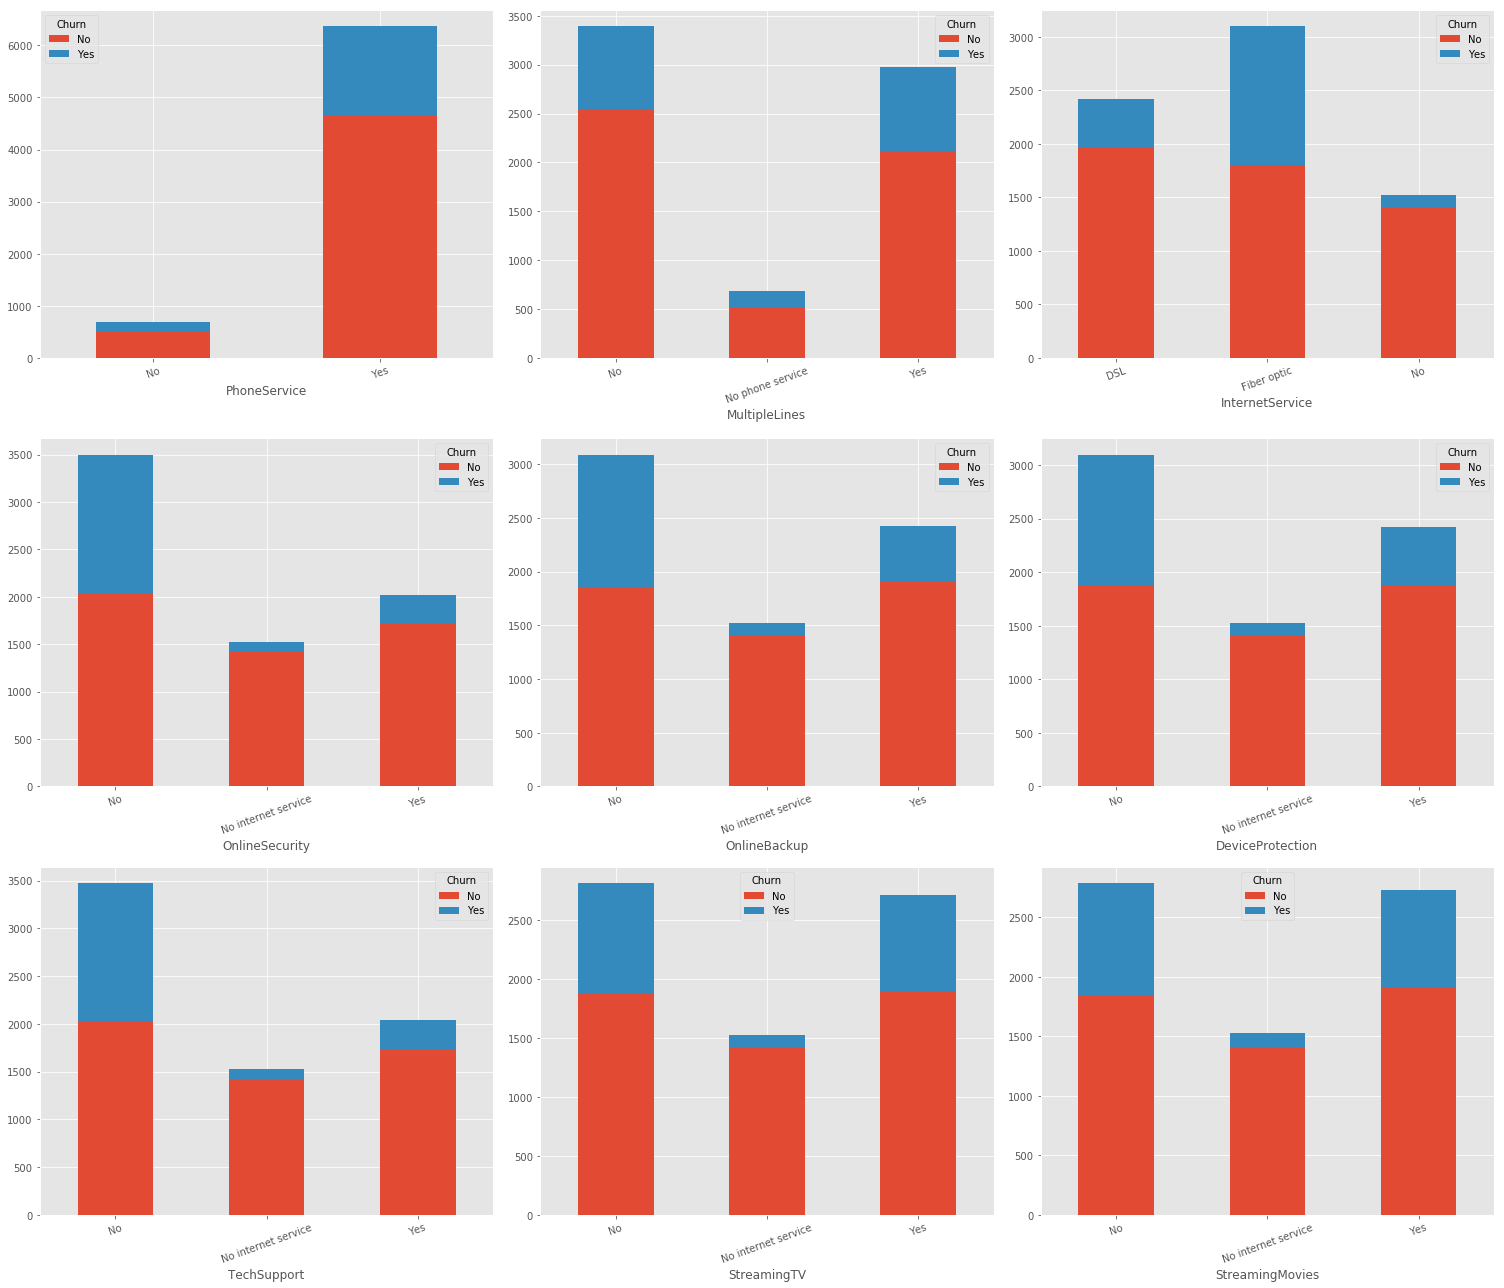

In [ ]:
cases=['PhoneService','MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies']
fig2,axs = plt.subplots(figsize=(21,18),ncols=3,nrows=len(cases)//3)
for i,case in enumerate(cases):
    ct = pd.crosstab(telcom[case], telcom['Churn'])
    ct.plot.bar(stacked=True, ax=axs[i//3,i%3], rot=20)
    plt.tight_layout()
    
plt.savefig(os.path.join(rst_dir, str(plot_num)+'service churn.png'))  
plot_num += 1
    
plt.show()

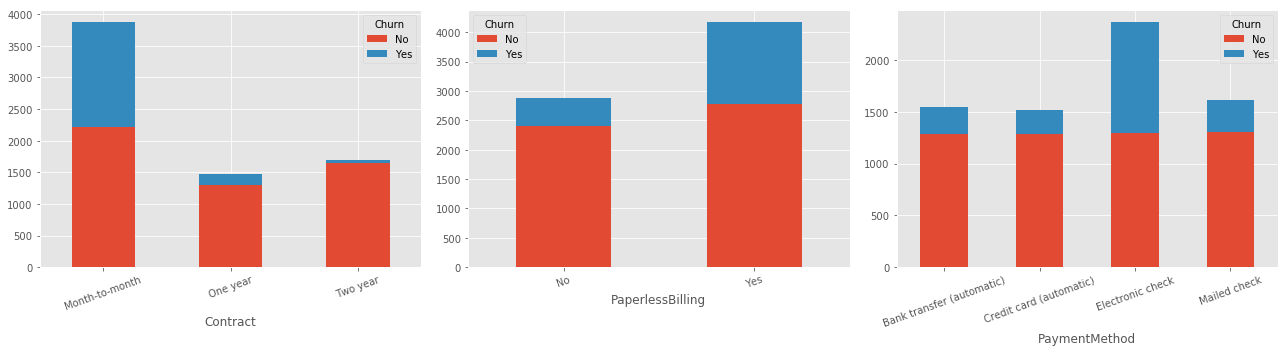

In [ ]:
cases=['Contract', 'PaperlessBilling','PaymentMethod']
fig3,axs = plt.subplots(figsize=(18,5),ncols=3,nrows=1)
for i,case in enumerate(cases):
    ct = pd.crosstab(telcom[case], telcom['Churn'])
    ct.plot.bar(stacked=True, ax=axs[i], rot=20)
    plt.tight_layout()

plt.savefig(os.path.join(rst_dir, str(plot_num)+'contract churn.png'))  
plot_num += 1

plt.show()

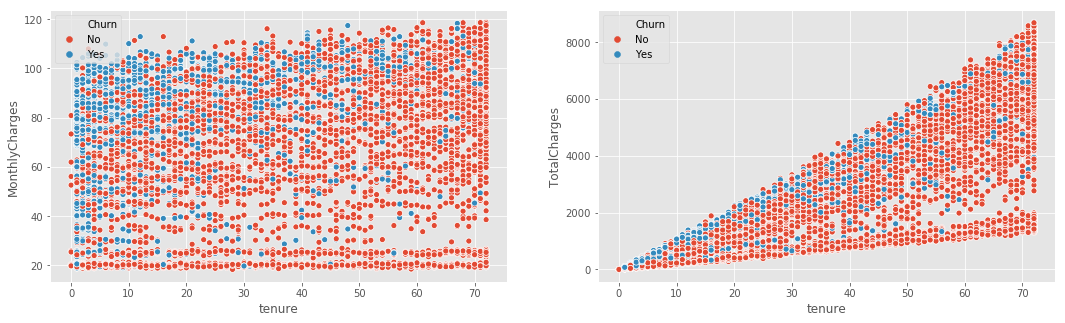

In [ ]:
fig4,(ax1,ax2) = plt.subplots(figsize=(18,5),nrows=1,ncols=2)
sns.scatterplot(x="tenure", y="MonthlyCharges", hue="Churn", data=telcom, ax=ax1)
sns.scatterplot(x="tenure", y="TotalCharges", hue="Churn", data=telcom,ax=ax2)

plt.savefig(os.path.join(rst_dir, str(plot_num)+'tenure_pay_churn.png'))  
plot_num += 1

plt.show()